# The Sprak Foundation #GRIPJUNE21

# Submitted by Shubh Patel

# GitHub Link : https://github.com/Shubh-Official/The-Sparks-Foundation-Data-Science-Business-Analytics

## Task-6 : Prediction using Decision Tree Algorithm

* Create the Decision Tree classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
* Dataset : https://bit.ly/3kXTdox

### Installing Necessary Packages

In [20]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [21]:
# Install required libraries
!pip install dtreeviz
!apt-get install dtreeviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package dtreeviz


### Importing Packages

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz

import graphviz

from dtreeviz.trees import dtreeviz
from IPython.core.display import display, HTML

### Exploring Data Set

In [23]:
data = pd.read_csv('Iris.csv')

print(data.shape)

(150, 6)


In [24]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Splitting into Input and Target Data

In [25]:
X = data.iloc[:, [1, 2, 3, 4]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
y = data.iloc[:, 5].values
y = np.where(y == 'Iris-setosa', 0, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)
y = y.astype('int')
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Applying Decision Tree Classifier

In [27]:
dtc = DecisionTreeClassifier(random_state = 3)
dtc.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

### Textal Representation of Decision Tree

In [28]:
text_representation_dtc = export_text(dtc)
print(text_representation_dtc)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



### Saving Textual Representation of Decision Tree as .log File

In [29]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation_dtc)

print("***** decisition_tree.log ***** Successfully Created")

***** decisition_tree.log ***** Successfully Created


### Graphical Representation of Decision Tree using plot_tree function

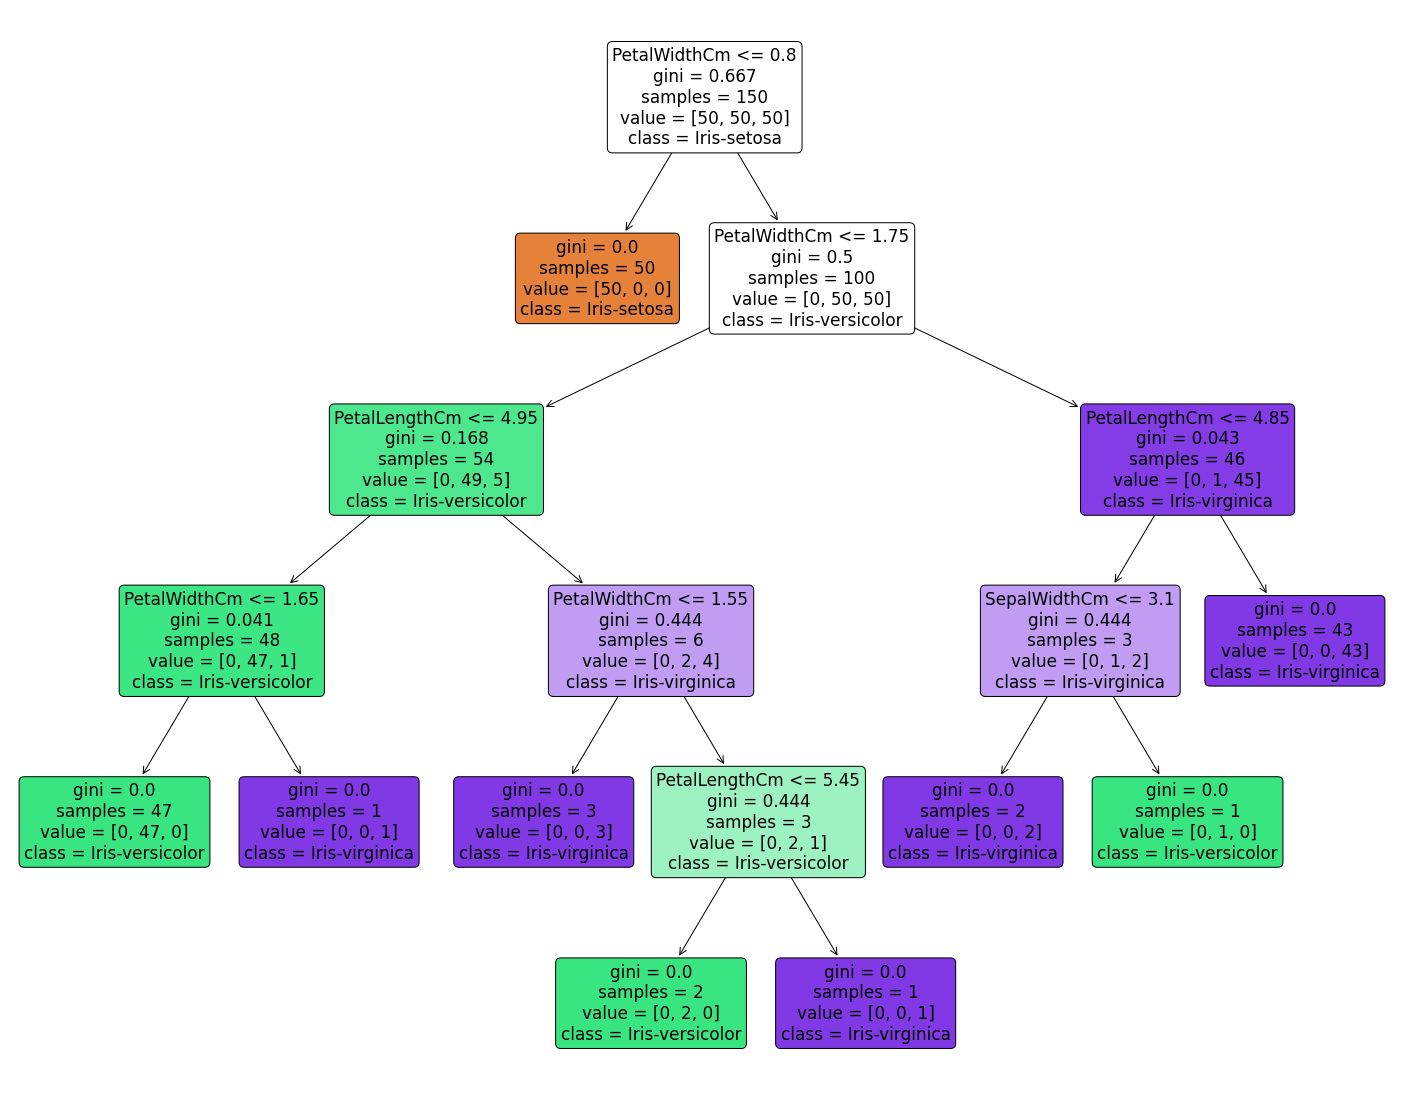

In [30]:
fig = plt.figure(figsize=(25,20))

_ = plot_tree(dtc, feature_names=data.columns[1:5], class_names=data.iloc[:,5].unique(), filled=True, rounded=True)

### Saving Graphical Representation of Decision Tree in .png Format

In [31]:
fig.savefig("decistion_tree.png")

print("***** decisition_tree.log ***** Saved Successfully")

***** decisition_tree.log ***** Saved Successfully


### Graphical Representation of Decision Tree using Graphviz library

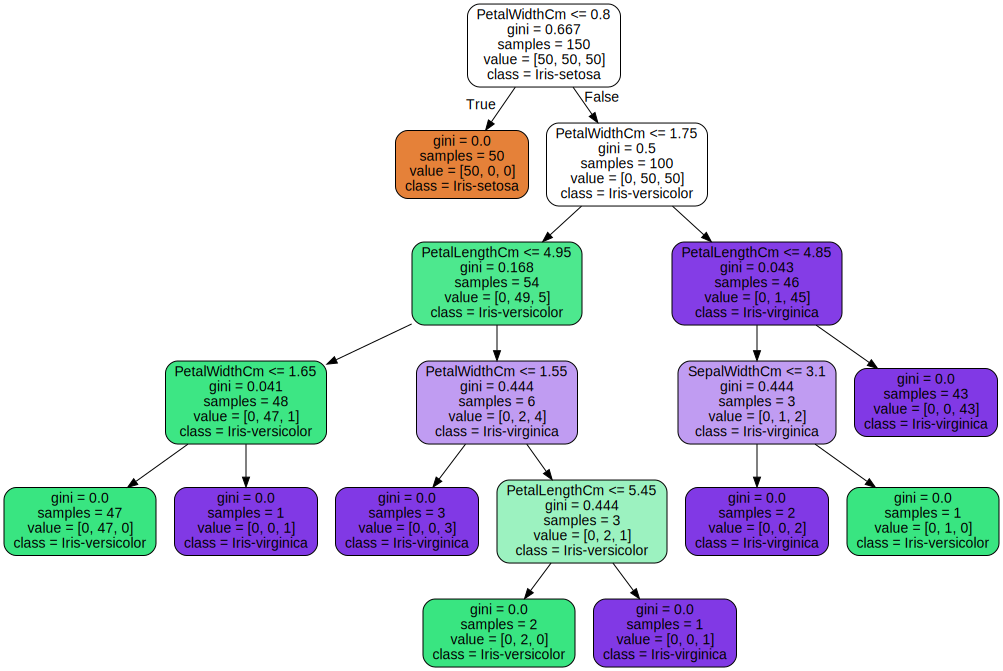

In [32]:
dtc_graph = export_graphviz(dtc, out_file=None, feature_names=data.columns[1:5], class_names=data.iloc[:,5].unique(), filled=True, rounded=True)

dtc_png = graphviz.Source(dtc_graph, format="png")
dtc_png

### Saving Graphical Representation of Decision Tree in .png Format

In [33]:
dtc_png.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### Graphical Representation of Desicion Tree using dtreeviz Package

In [34]:
viz = dtreeviz(
        dtc,
        X,
        y,
        target_name='Species',
        feature_names=data.columns[1:5], 
        class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
        fancy=True
    )

display(HTML(viz.svg()))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


References for **dtreeviz** Library / Packages

https://mljar.com/blog/visualize-decision-tree/

https://stackoverflow.com/questions/56683489/use-dtreeviz-to-visualize-decision-tree